# EDA

## 0.0 Checking Environment

In [1]:
import sys
import IPython

# Change path to append here
sys.path.append(r'C:\Users\hp\Downloads\Machine Learning Assignment')

print("Python executable:", sys.executable)
print("Python version:", sys.version)
print("Kernel:", IPython.get_ipython().kernel)
print("Sys paths:", sys.path)

Python executable: C:\Users\hp\anaconda3\envs\machine_learning_assignment\python.exe
Python version: 3.11.9 | packaged by Anaconda, Inc. | (main, Apr 19 2024, 16:40:41) [MSC v.1916 64 bit (AMD64)]
Kernel: <ipykernel.ipkernel.IPythonKernel object at 0x0000025E28BC5150>
Sys paths: ['C:\\Users\\hp\\Downloads\\Machine_Learning_Assignment\\testing', 'C:\\Users\\hp\\Downloads\\Machine_Learning_Assignment', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\python311.zip', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\DLLs', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment', '', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages\\win32', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learning_assignment\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\hp\\anaconda3\\envs\\machine_learn

## 1.0 Importing Libraries

In [143]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

## 2.0 Loading Data

In [4]:
df = pd.read_csv(r'../raw_data/customer_preprocessed_imputed_knn_n3_outlier_retained.csv')

df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,KNN_IMPUTED_CREDIT_LIMIT,PAYMENTS,KNN_IMPUTED_MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.178190,1733.143852,854.290836,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.702906,2895.063757,2351.606794,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,166.269650,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,300.487478,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,804.414788,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


## 3.0 EDA
### 3.1 Univariate EDA
#### 3.1.1 BALANCE 

Text(0.5, 1.0, 'Distribution Plot: BALANCE')

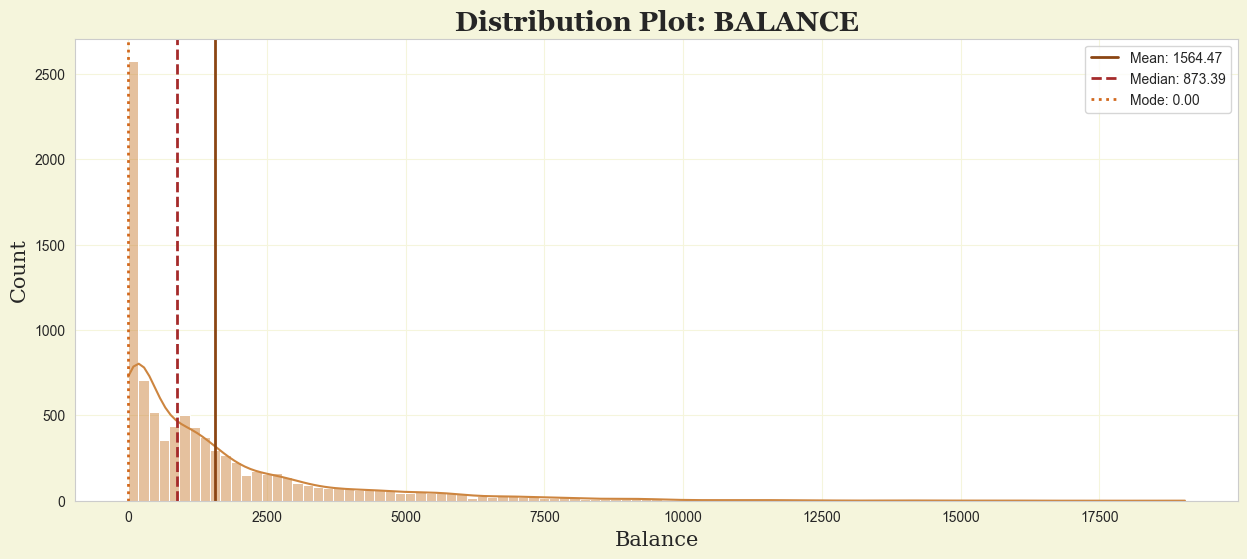

In [55]:
balance = df['BALANCE']
mean_balance = df['BALANCE'].mean()
median_balance = df['BALANCE'].median()
mode_balance = df['BALANCE'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(balance, kde=True, stat='count', color='peru')
plt.axvline(mean_balance, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_balance:.2f}')
plt.axvline(median_balance, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_balance:.2f}')
plt.axvline(mode_balance, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_balance:.2f}')
plt.grid(visible=True, color ='beige') 
plt.legend()
plt.xlabel('Balance', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: BALANCE', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.2 BALANCE_FREQUENCY

Text(0.5, 1.0, 'Distribution Plot: BALANCE_FREQUENCY')

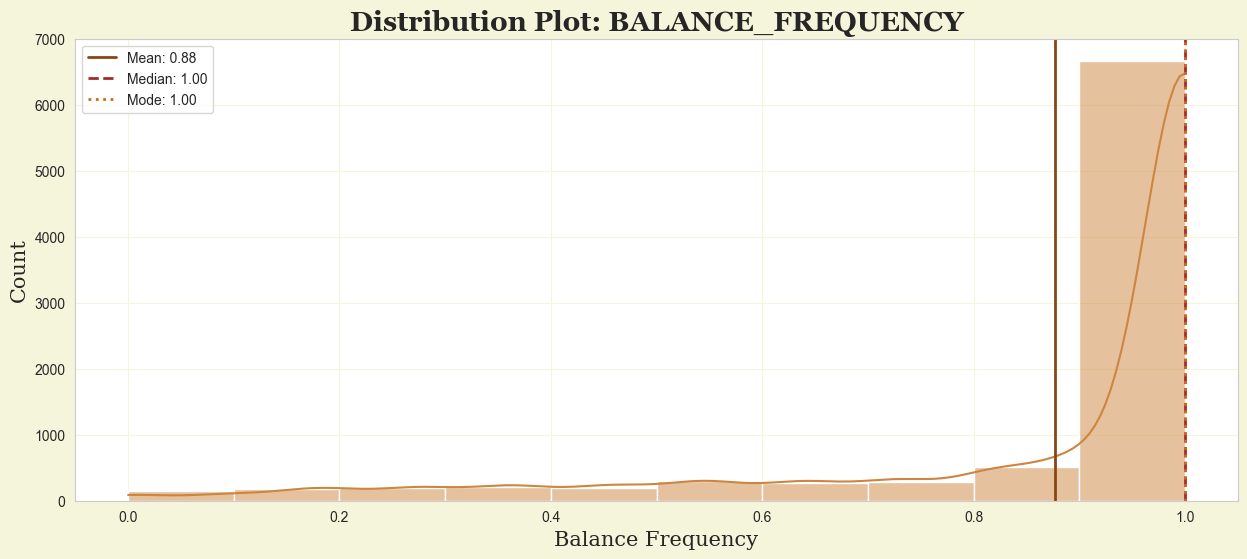

In [60]:
balance_freq = df['BALANCE_FREQUENCY']
mean_balance_freq = df['BALANCE_FREQUENCY'].mean()
median_balance_freq = df['BALANCE_FREQUENCY'].median()
mode_balance_freq = df['BALANCE_FREQUENCY'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(balance_freq, kde=True, stat='count', color='peru', binwidth=0.1)
plt.axvline(mean_balance_freq, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_balance_freq:.2f}')
plt.axvline(median_balance_freq, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_balance_freq:.2f}')
plt.axvline(mode_balance_freq, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_balance_freq:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Balance Frequency', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: BALANCE_FREQUENCY', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.3 PURCHASES

Text(0.5, 1.0, 'Distribution Plot: PURCHASES')

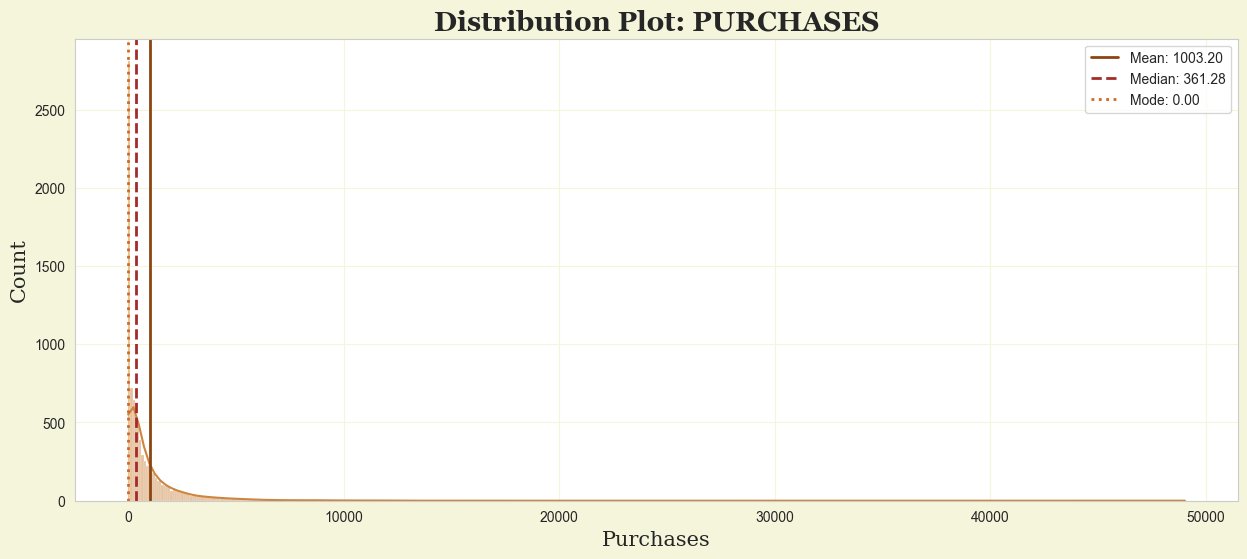

In [71]:
purchases = df['PURCHASES']
mean_purchases = df['PURCHASES'].mean()
median_purchases = df['PURCHASES'].median()
mode_purchases = df['PURCHASES'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(purchases, kde=True, stat='count', color='peru')
plt.axvline(mean_purchases, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_purchases:.2f}')
plt.axvline(median_purchases, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_purchases:.2f}')
plt.axvline(mode_purchases, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_purchases:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Purchases', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: PURCHASES', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.4 ONEOFF_PURCHASES

Text(0.5, 1.0, 'Distribution Plot: ONEOFF_PURCHASES')

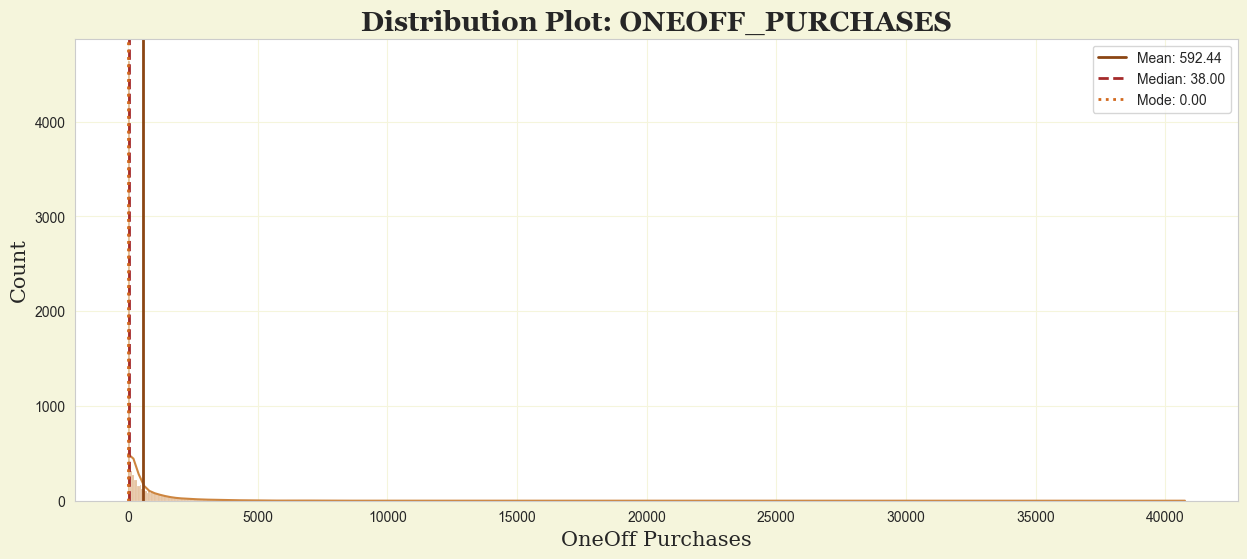

In [73]:
oneoff_purchases = df['ONEOFF_PURCHASES']
mean_oneoff_purchases = df['ONEOFF_PURCHASES'].mean()
median_oneoff_purchases = df['ONEOFF_PURCHASES'].median()
mode_oneoff_purchases = df['ONEOFF_PURCHASES'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(oneoff_purchases, kde=True, stat='count', color='peru')
plt.axvline(mean_oneoff_purchases, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_oneoff_purchases:.2f}')
plt.axvline(median_oneoff_purchases, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_oneoff_purchases:.2f}')
plt.axvline(mode_oneoff_purchases, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_oneoff_purchases:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('OneOff Purchases', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: ONEOFF_PURCHASES', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.5 INSTALLMENTS_PURCHASES

Text(0.5, 1.0, 'Distribution Plot: INSTALLMENTS_PURCHASES')

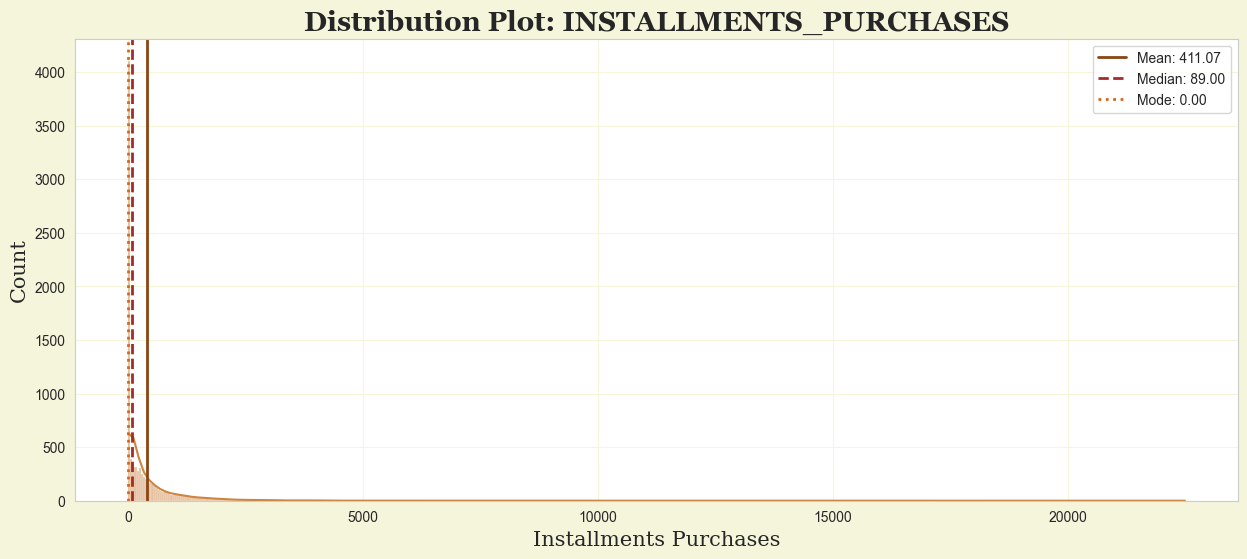

In [74]:
installments_purchases = df['INSTALLMENTS_PURCHASES']
mean_installments_purchases = df['INSTALLMENTS_PURCHASES'].mean()
median_installments_purchases = df['INSTALLMENTS_PURCHASES'].median()
mode_installments_purchases = df['INSTALLMENTS_PURCHASES'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(installments_purchases, kde=True, stat='count', color='peru')
plt.axvline(mean_installments_purchases, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_installments_purchases:.2f}')
plt.axvline(median_installments_purchases, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_installments_purchases:.2f}')
plt.axvline(mode_installments_purchases, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_installments_purchases:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Installments Purchases', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: INSTALLMENTS_PURCHASES', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.6 CASH_ADVANCE

Text(0.5, 1.0, 'Distribution Plot: CASH_ADVANCE')

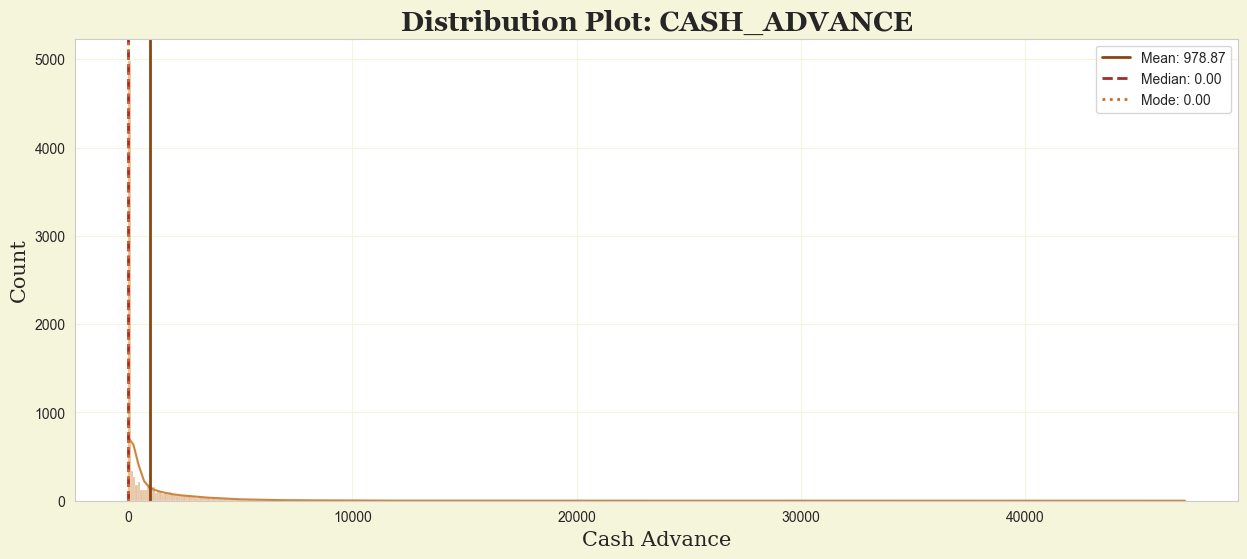

In [75]:
cash_advance = df['CASH_ADVANCE']
mean_cash_advance = df['CASH_ADVANCE'].mean()
median_cash_advance = df['CASH_ADVANCE'].median()
mode_cash_advance = df['CASH_ADVANCE'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(cash_advance, kde=True, stat='count', color='peru')
plt.axvline(mean_cash_advance, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_cash_advance:.2f}')
plt.axvline(median_cash_advance, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_cash_advance:.2f}')
plt.axvline(mode_cash_advance, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_cash_advance:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Cash Advance', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: CASH_ADVANCE', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.7 PURCHASES_FREQUENCY

Text(0.5, 1.0, 'Distribution Plot: PURCHASES_FREQUENCY')

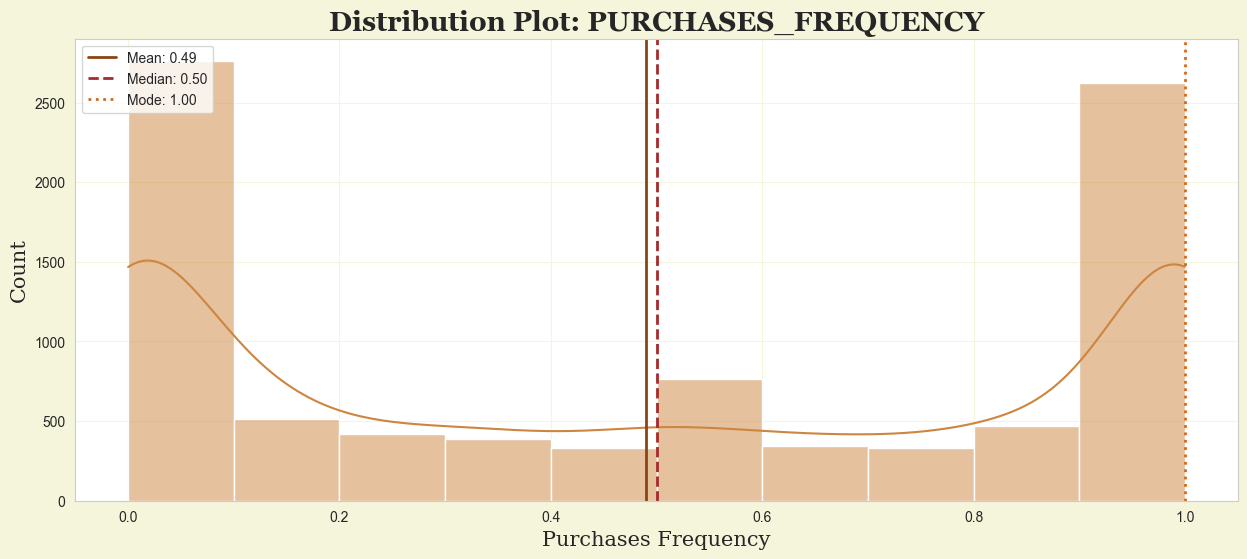

In [78]:
purchases_freq = df['PURCHASES_FREQUENCY']
mean_purchases_freq = df['PURCHASES_FREQUENCY'].mean()
median_purchases_freq = df['PURCHASES_FREQUENCY'].median()
mode_purchases_freq = df['PURCHASES_FREQUENCY'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(purchases_freq, kde=True, stat='count', color='peru', binwidth=0.1)
plt.axvline(mean_purchases_freq, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_purchases_freq:.2f}')
plt.axvline(median_purchases_freq, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_purchases_freq:.2f}')
plt.axvline(mode_purchases_freq, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_purchases_freq:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Purchases Frequency', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: PURCHASES_FREQUENCY', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.8 ONEOFF_PURCHASES_FREQUENCY

Text(0.5, 1.0, 'Distribution Plot: ONEOFF_PURCHASES_FREQUENCY')

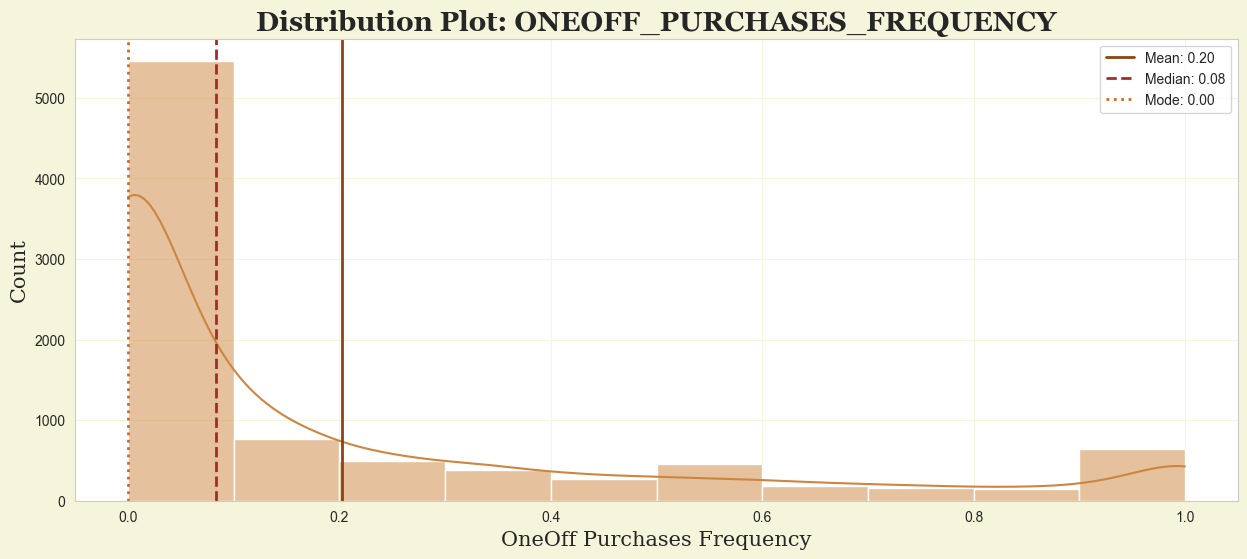

In [79]:
oneoff_purchases_freq = df['ONEOFF_PURCHASES_FREQUENCY']
mean_oneoff_purchases_freq = df['ONEOFF_PURCHASES_FREQUENCY'].mean()
median_oneoff_purchases_freq = df['ONEOFF_PURCHASES_FREQUENCY'].median()
mode_oneoff_purchases_freq = df['ONEOFF_PURCHASES_FREQUENCY'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(oneoff_purchases_freq, kde=True, stat='count', color='peru', binwidth=0.1)
plt.axvline(mean_oneoff_purchases_freq, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_oneoff_purchases_freq:.2f}')
plt.axvline(median_oneoff_purchases_freq, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_oneoff_purchases_freq:.2f}')
plt.axvline(mode_oneoff_purchases_freq, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_oneoff_purchases_freq:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('OneOff Purchases Frequency', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: ONEOFF_PURCHASES_FREQUENCY', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.9 PURCHASES_INSTALLMENTS_FREQUENCY

Text(0.5, 1.0, 'Distribution Plot: PURCHASES_INSTALLMENTS_FREQUENCY')

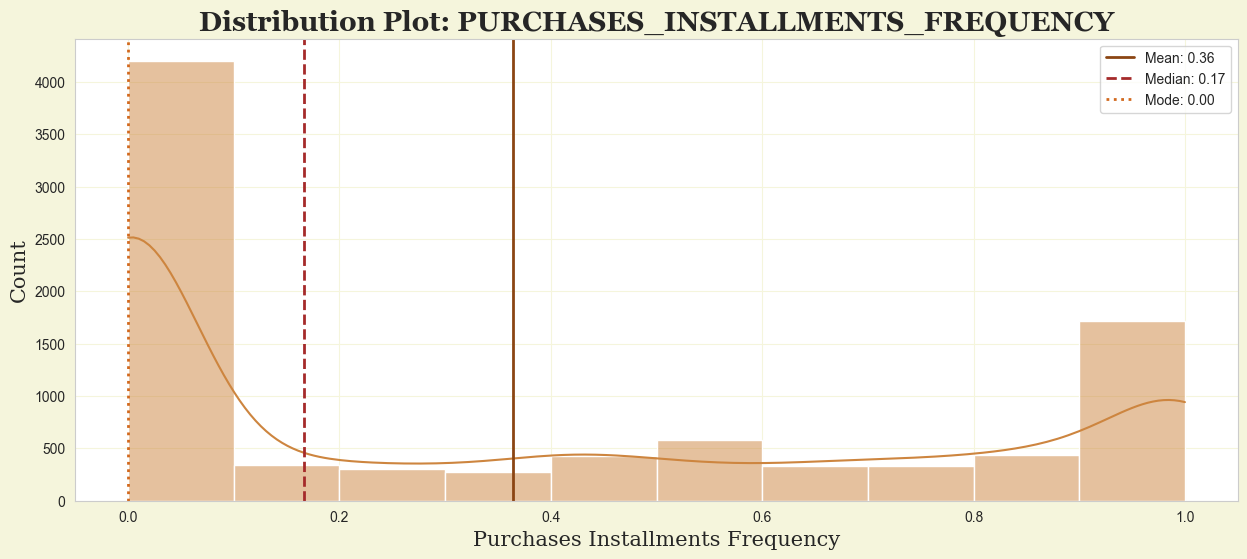

In [80]:
purchases_installments_freq = df['PURCHASES_INSTALLMENTS_FREQUENCY']
mean_purchases_installments_freq = df['PURCHASES_INSTALLMENTS_FREQUENCY'].mean()
median_purchases_installments_freq = df['PURCHASES_INSTALLMENTS_FREQUENCY'].median()
mode_purchases_installments_freq = df['PURCHASES_INSTALLMENTS_FREQUENCY'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(purchases_installments_freq, kde=True, stat='count', color='peru', binwidth=0.1)
plt.axvline(mean_purchases_installments_freq, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_purchases_installments_freq:.2f}')
plt.axvline(median_purchases_installments_freq, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_purchases_installments_freq:.2f}')
plt.axvline(mode_purchases_installments_freq, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_purchases_installments_freq:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Purchases Installments Frequency', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: PURCHASES_INSTALLMENTS_FREQUENCY', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.10 CASH_ADVANCE_FREQUENCY

In [ ]:
cash_advance_freq = df['CASH_ADVANCE_FREQUENCY']
mean_cash_advance_freq = df['CASH_ADVANCE_FREQUENCY'].mean()
median_cash_advance_freq = df['CASH_ADVANCE_FREQUENCY'].median()
mode_cash_advance_freq = df['CASH_ADVANCE_FREQUENCY'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(cash_advance_freq, kde=True, stat='count', color='peru', binwidth=0.1)
plt.axvline(mean_cash_advance_freq, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_cash_advance_freq:.2f}')
plt.axvline(median_cash_advance_freq, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_cash_advance_freq:.2f}')
plt.axvline(mode_cash_advance_freq, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_cash_advance_freq:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Cash Advance Frequency', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: CASH_ADVANCE_FREQUENCY', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})


#### 3.1.11 CASH_ADVANCE_TRX

Text(0.5, 1.0, 'Distribution Plot: CASH_ADVANCE_TRX')

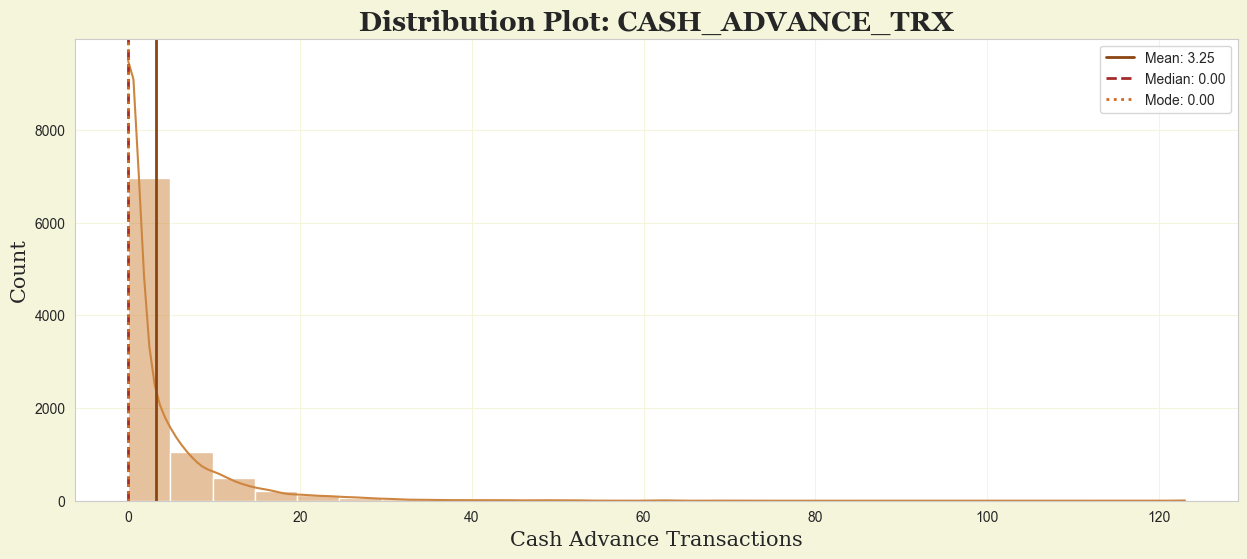

In [84]:
cash_advance_trx = df['CASH_ADVANCE_TRX']
mean_cash_advance_trx = df['CASH_ADVANCE_TRX'].mean()
median_cash_advance_trx = df['CASH_ADVANCE_TRX'].median()
mode_cash_advance_trx = df['CASH_ADVANCE_TRX'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(cash_advance_trx, kde=True, stat='count', color='peru', binwidth=5)
plt.axvline(mean_cash_advance_trx, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_cash_advance_trx:.2f}')
plt.axvline(median_cash_advance_trx, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_cash_advance_trx:.2f}')
plt.axvline(mode_cash_advance_trx, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_cash_advance_trx:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Cash Advance Transactions', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: CASH_ADVANCE_TRX', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.12 PURCHASES_TRX

Text(0.5, 1.0, 'Distribution Plot: PURCHASES_TRX')

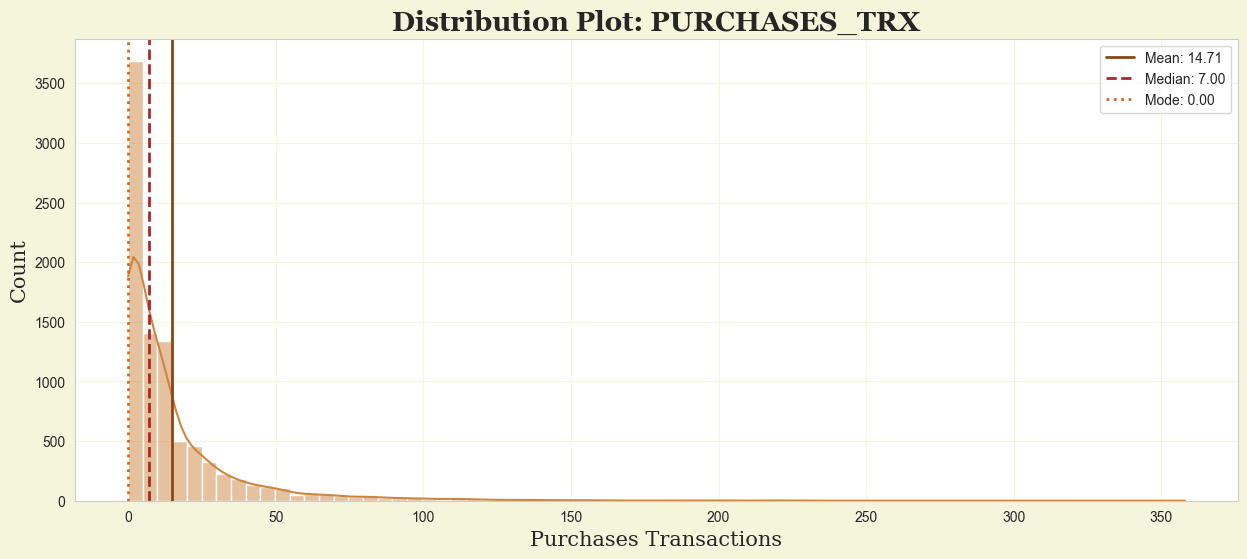

In [85]:
purchases_trx = df['PURCHASES_TRX']
mean_purchases_trx = df['PURCHASES_TRX'].mean()
median_purchases_trx = df['PURCHASES_TRX'].median()
mode_purchases_trx = df['PURCHASES_TRX'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(purchases_trx, kde=True, stat='count', color='peru', binwidth=5)
plt.axvline(mean_purchases_trx, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_purchases_trx:.2f}')
plt.axvline(median_purchases_trx, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_purchases_trx:.2f}')
plt.axvline(mode_purchases_trx, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_purchases_trx:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Purchases Transactions', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: PURCHASES_TRX', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.13 CREDIT_LIMIT

Text(0.5, 1.0, 'Distribution Plot: CREDIT_LIMIT')

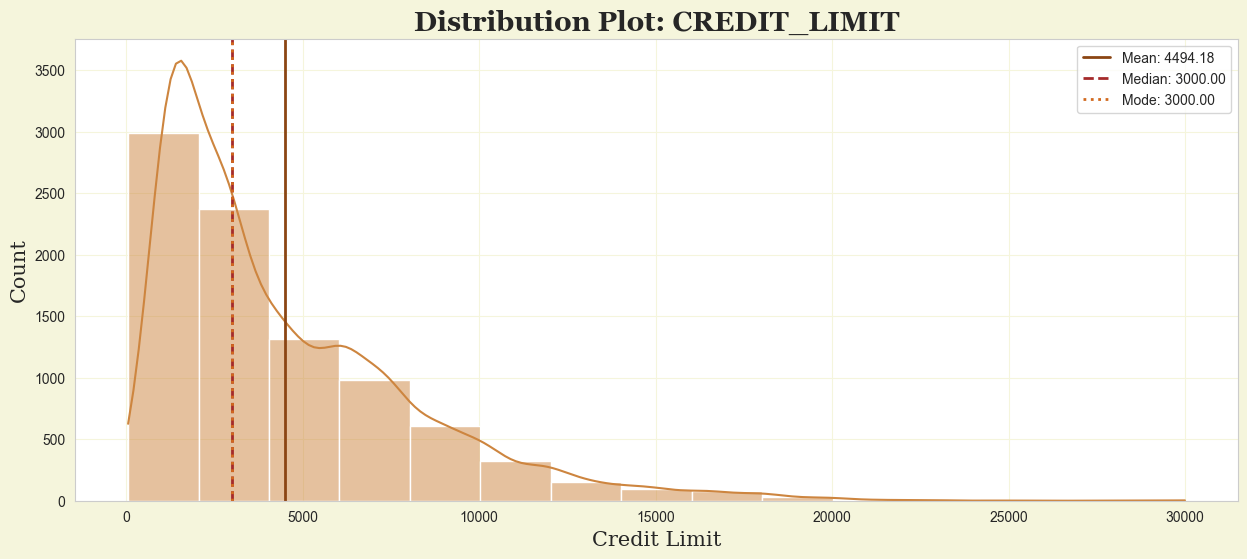

In [88]:
credit_limit = df['KNN_IMPUTED_CREDIT_LIMIT']
mean_credit_limit = df['KNN_IMPUTED_CREDIT_LIMIT'].mean()
median_credit_limit = df['KNN_IMPUTED_CREDIT_LIMIT'].median()
mode_credit_limit = df['KNN_IMPUTED_CREDIT_LIMIT'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(credit_limit, kde=True, stat='count', color='peru', binwidth=2000)
plt.axvline(mean_credit_limit, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_credit_limit:.2f}')
plt.axvline(median_credit_limit, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_credit_limit:.2f}')
plt.axvline(mode_credit_limit, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_credit_limit:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Credit Limit', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: CREDIT_LIMIT', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.14 PAYMENTS

Text(0.5, 1.0, 'Distribution Plot: PAYMENTS')

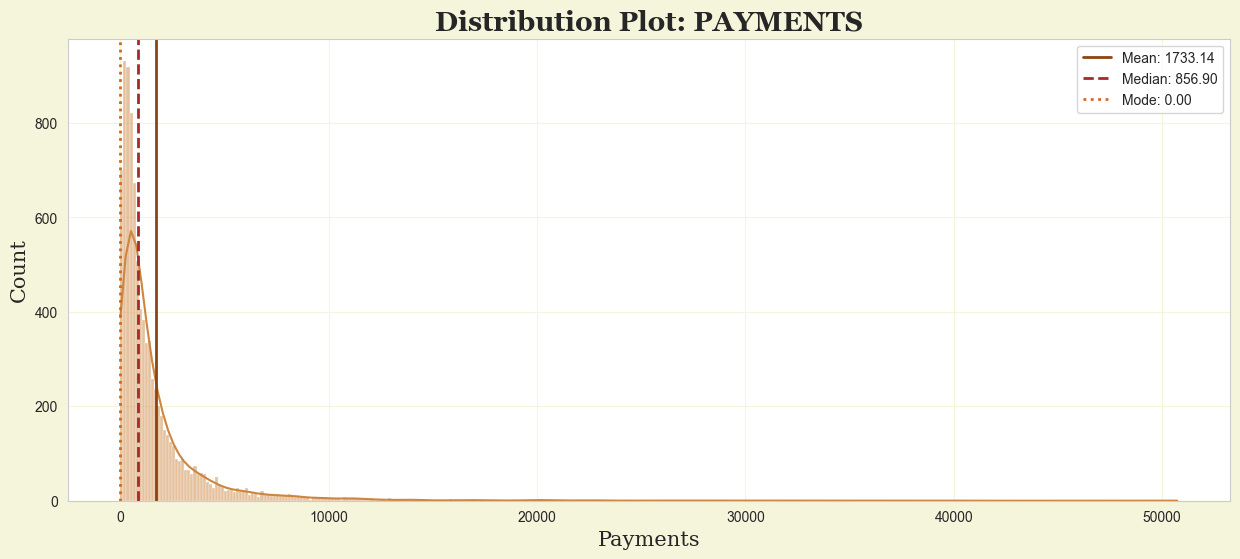

In [89]:
payments = df['PAYMENTS']
mean_payments = df['PAYMENTS'].mean()
median_payments = df['PAYMENTS'].median()
mode_payments = df['PAYMENTS'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(payments, kde=True, stat='count', color='peru')
plt.axvline(mean_payments, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_payments:.2f}')
plt.axvline(median_payments, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_payments:.2f}')
plt.axvline(mode_payments, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_payments:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Payments', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: PAYMENTS', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.15 MINIMUM_PAYMENTS

Text(0.5, 1.0, 'Distribution Plot: MINIMUM_PAYMENTS')

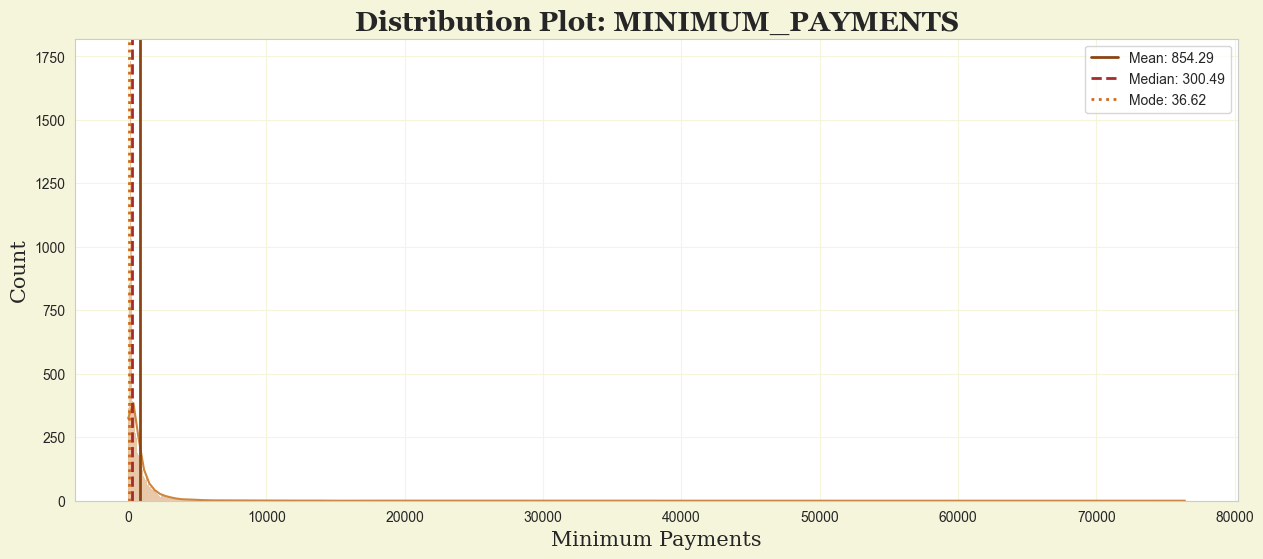

In [91]:
min_payments = df['KNN_IMPUTED_MINIMUM_PAYMENTS']
mean_min_payments = df['KNN_IMPUTED_MINIMUM_PAYMENTS'].mean()
median_min_payments = df['KNN_IMPUTED_MINIMUM_PAYMENTS'].median()
mode_min_payments = df['KNN_IMPUTED_MINIMUM_PAYMENTS'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(min_payments, kde=True, stat='count', color='peru')
plt.axvline(mean_min_payments, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_min_payments:.2f}')
plt.axvline(median_min_payments, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_min_payments:.2f}')
plt.axvline(mode_min_payments, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_min_payments:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Minimum Payments', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: MINIMUM_PAYMENTS', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.16 PRC_FULL_PAYMENT

Text(0.5, 1.0, 'Distribution Plot: PRC_FULL_PAYMENT')

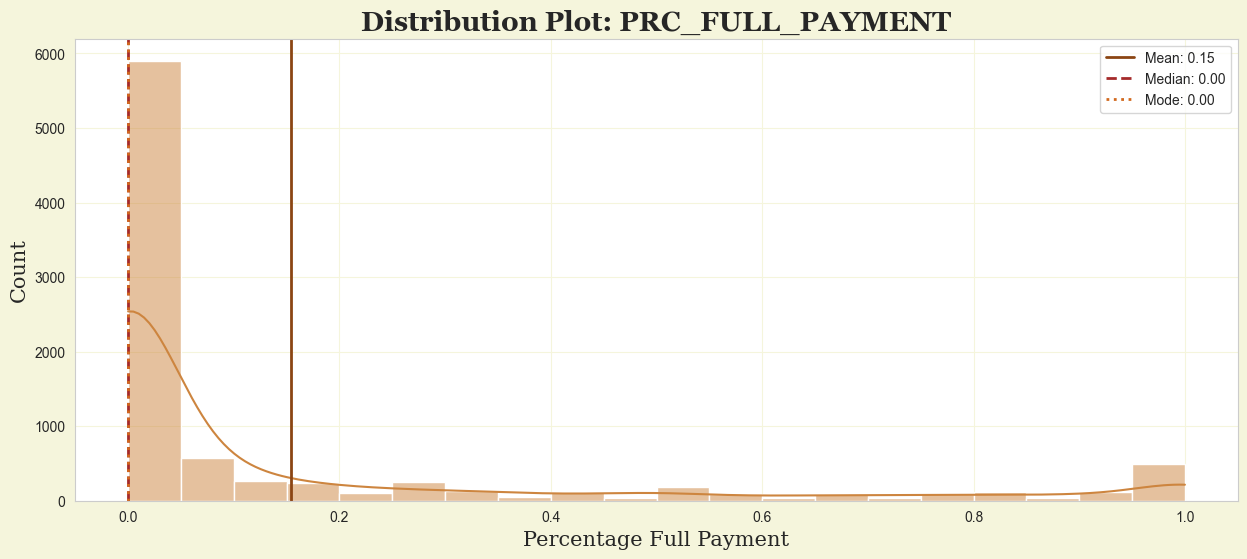

In [98]:
prc_full_payment = df['PRC_FULL_PAYMENT']
mean_prc_full_payment = df['PRC_FULL_PAYMENT'].mean()
median_prc_full_payment = df['PRC_FULL_PAYMENT'].median()
mode_prc_full_payment = df['PRC_FULL_PAYMENT'].mode()[0]

plt.figure(figsize=(15, 6), facecolor='beige')
sns.histplot(prc_full_payment, kde=True, stat='count', color='peru', binwidth=0.05)
plt.axvline(mean_prc_full_payment, color='saddlebrown', linestyle='-', linewidth=2, label=f'Mean: {mean_prc_full_payment:.2f}')
plt.axvline(median_prc_full_payment, color='brown', linestyle='--', linewidth=2, label=f'Median: {median_prc_full_payment:.2f}')
plt.axvline(mode_prc_full_payment, color='chocolate', linestyle=':', linewidth=2, label=f'Mode: {mode_prc_full_payment:.2f}')
plt.grid(visible=True, color ='beige')
plt.legend()
plt.xlabel('Percentage Full Payment', fontdict = {'family' : 'serif', 'size' : 15})
plt.ylabel('Count', fontdict = {'family' : 'serif', 'size' : 15})
plt.title('Distribution Plot: PRC_FULL_PAYMENT', fontdict = {'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

#### 3.1.17 TENURE

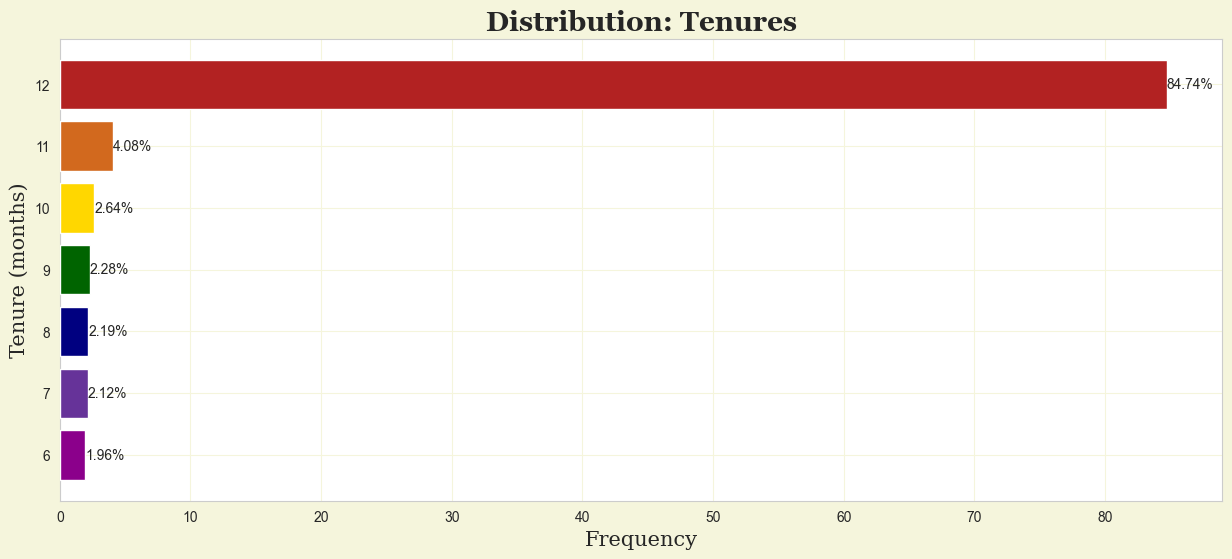

In [97]:
# data
x = df['TENURE'].value_counts().sort_values(ascending=False)
column_sum = sum(x)
x_percent = [(row / column_sum) * 100 for row in x]
y = x.index.sort_values(ascending=False)

# create figure
fig, ax = plt.subplots(figsize=(15, 6))

# configure properties
colours = ('firebrick', 'chocolate', 'gold', 'darkgreen', 'navy', 'rebeccapurple', 'darkmagenta')
fig.patch.set_facecolor('beige')
ax.grid(visible=True, color='beige', zorder=0)

# plot
bars = ax.barh(y, x_percent, color=colours, zorder=3)
ax.bar_label(bars, fmt='%.2f%%')
ax.set_ylabel('Tenure (months)', fontdict={'family' : 'serif', 'size' : 15})
ax.set_xlabel('Frequency', fontdict={'family' : 'serif', 'size' : 15})
ax.set_title('Distribution: Tenures', fontdict={'family' : 'georgia', 'weight' : 'bold', 'size' : 20})

# show plot
plt.show()

### 3.2 Bivariate EDA
#### 3.2.1 CREDIT LIMIT vs TENURE

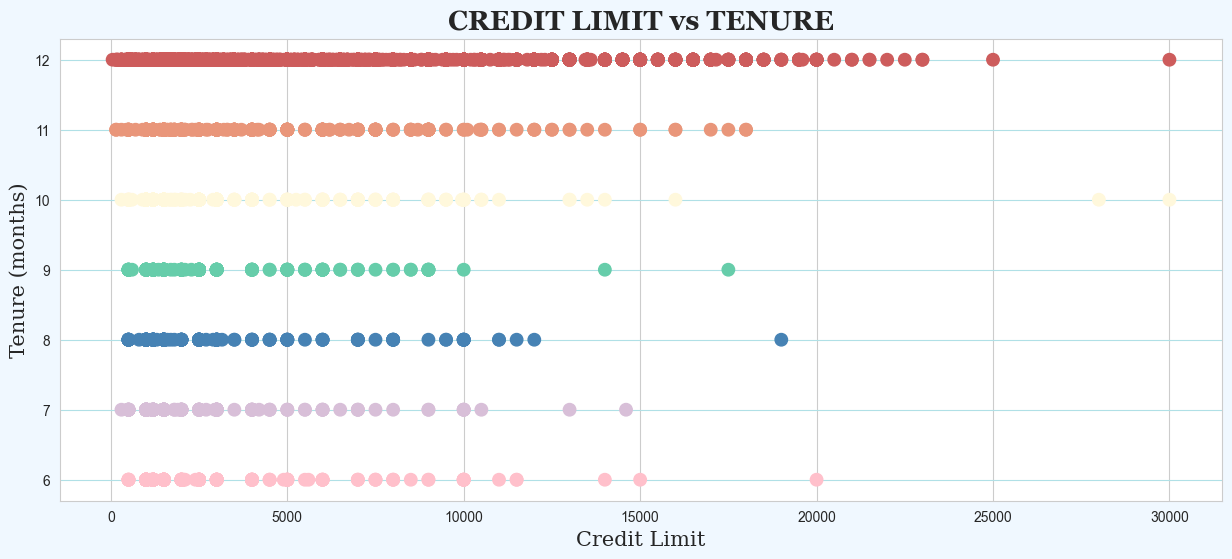

In [105]:
# Data
x = df['KNN_IMPUTED_CREDIT_LIMIT']
y = df['TENURE']

# Color mapping for different tenure values
color_map = {
    12: 'indianred',
    11: 'darksalmon',
    10: 'cornsilk',
    9: 'mediumaquamarine',
    8: 'steelblue',
    7: 'thistle'
}

# Construct color list using list comprehension
colors = [color_map.get(value, 'pink') for value in y]

# Plot
plt.figure(figsize=(15, 6)).patch.set_facecolor('aliceblue')
plt.scatter(x, y, c=colors, zorder=3, s=80)
plt.xlabel('Credit Limit', fontdict={'family': 'serif', 'size': 15})
plt.ylabel('Tenure (months)', fontdict={'family': 'serif', 'size': 15})
plt.title('CREDIT LIMIT vs TENURE', fontdict={'family': 'georgia', 'weight': 'bold', 'size': 20})

# Configure grid
plt.gca().grid(visible=True, color='powderblue', zorder=1, axis='y')

# Show plot
plt.show()

#### 3.2.2 PURCHASES vs ONEOFF_PURCHASES

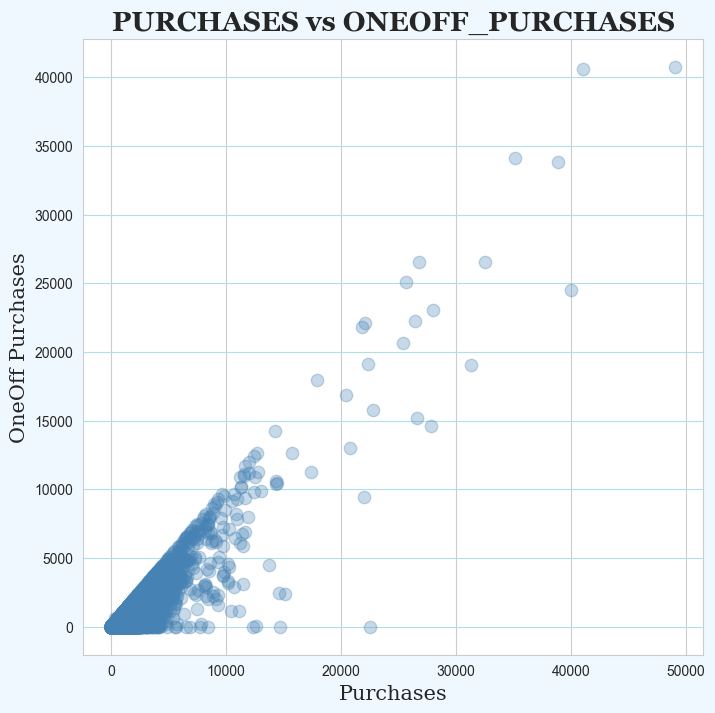

In [137]:
# Data
x = df['PURCHASES']
y = df['ONEOFF_PURCHASES']

# Plot
plt.figure(figsize=(8, 8)).patch.set_facecolor('aliceblue')
plt.scatter(x, y, c='steelblue', zorder=3, s=80, alpha=0.3)
plt.xlabel('Purchases', fontdict={'family': 'serif', 'size': 15})
plt.ylabel('OneOff Purchases', fontdict={'family': 'serif', 'size': 15})
plt.title('PURCHASES vs ONEOFF_PURCHASES', fontdict={'family': 'georgia', 'weight': 'bold', 'size': 20})

# Configure grid
plt.gca().grid(visible=True, color='powderblue', zorder=1, axis='y')

# Show plot
plt.show()

#### 3.2.3 PURCHASES vs INSTALLMENTS_PURCHASES

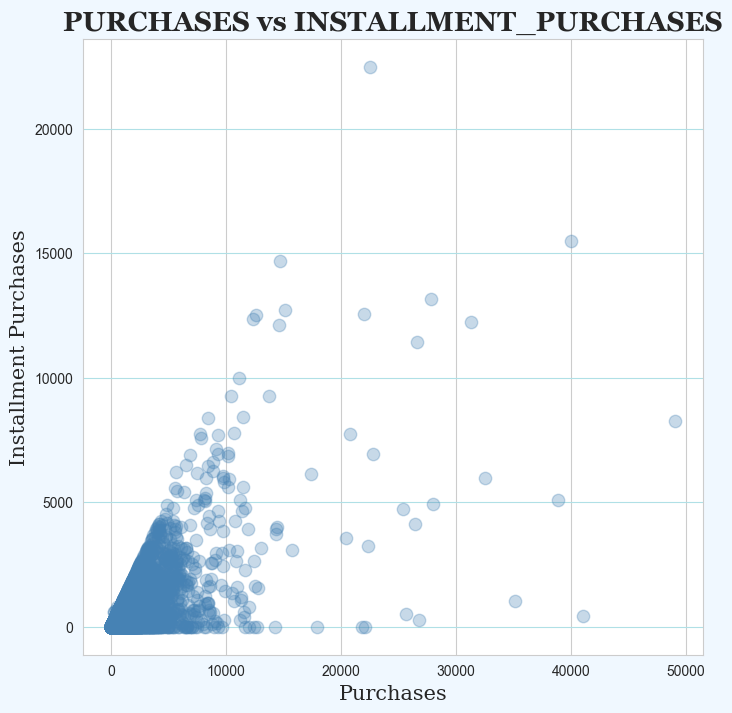

In [139]:
# Data
x = df['PURCHASES']
y = df['INSTALLMENTS_PURCHASES']

# Plot
plt.figure(figsize=(8, 8)).patch.set_facecolor('aliceblue')
plt.scatter(x, y, c='steelblue', zorder=3, s=80, alpha=0.3)
plt.xlabel('Purchases', fontdict={'family': 'serif', 'size': 15})
plt.ylabel('Installment Purchases', fontdict={'family': 'serif', 'size': 15})
plt.title('PURCHASES vs INSTALLMENT_PURCHASES', fontdict={'family': 'georgia', 'weight': 'bold', 'size': 20})

# Configure grid
plt.gca().grid(visible=True, color='powderblue', zorder=1, axis='y')

# Show plot
plt.show()

#### 3.2.4 BALANCE vs CASH_ADVANCE

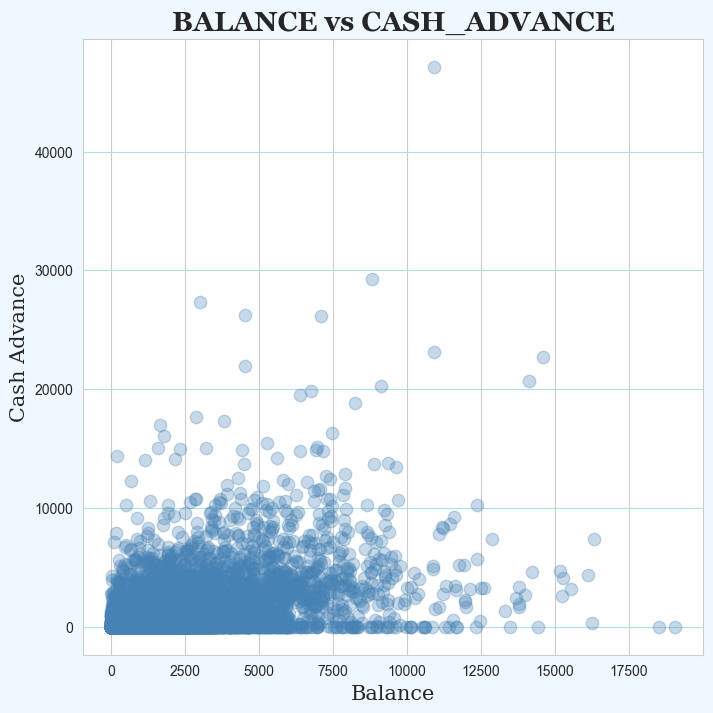

In [135]:
# Data
x = df['BALANCE']
y = df['CASH_ADVANCE']

# Plot
plt.figure(figsize=(8, 8)).patch.set_facecolor('aliceblue')
plt.scatter(x, y, c='steelblue', zorder=3, s=80, alpha=0.3)
plt.xlabel('Balance', fontdict={'family': 'serif', 'size': 15})
plt.ylabel('Cash Advance', fontdict={'family': 'serif', 'size': 15})
plt.title('BALANCE vs CASH_ADVANCE', fontdict={'family': 'georgia', 'weight': 'bold', 'size': 20})

# Configure grid
plt.gca().grid(visible=True, color='powderblue', zorder=1, axis='y')

# Show plot
plt.show()

#### 3.2.5 BALANCE vs CREDIT_LIMIT

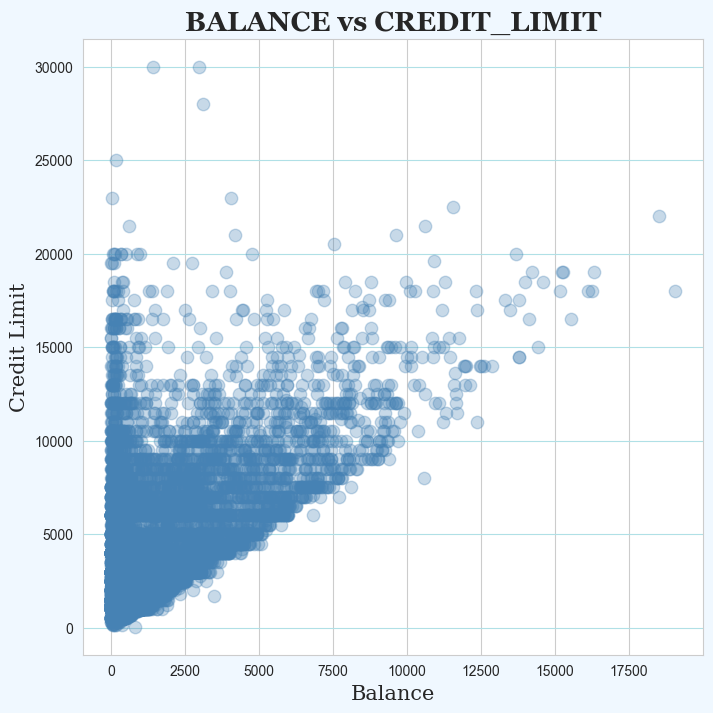

In [140]:
# Data
x = df['BALANCE']
y = df['KNN_IMPUTED_CREDIT_LIMIT']

# Plot
plt.figure(figsize=(8, 8)).patch.set_facecolor('aliceblue')
plt.scatter(x, y, c='steelblue', zorder=3, s=80, alpha=0.3)
plt.xlabel('Balance', fontdict={'family': 'serif', 'size': 15})
plt.ylabel('Credit Limit', fontdict={'family': 'serif', 'size': 15})
plt.title('BALANCE vs CREDIT_LIMIT', fontdict={'family': 'georgia', 'weight': 'bold', 'size': 20})

# Configure grid
plt.gca().grid(visible=True, color='powderblue', zorder=1, axis='y')

# Show plot
plt.show()

#### 3.2.6 PURCHASES_FREQUENCY vs PURCHASE_INSTALLMENT_FREQUENCY

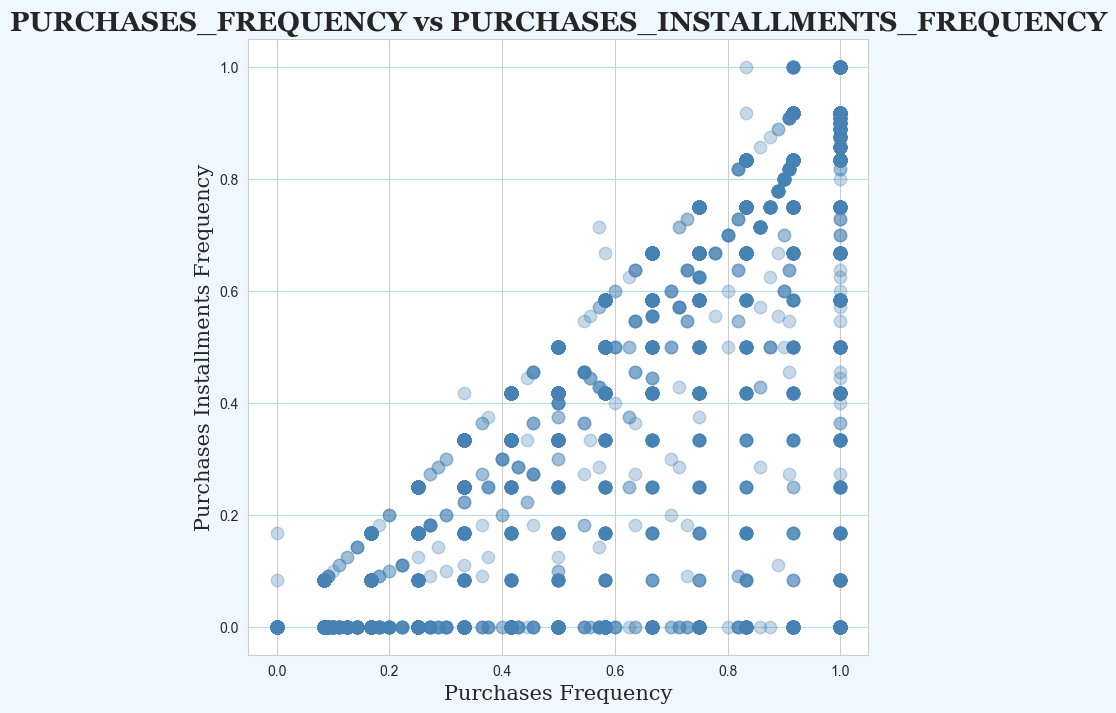

In [141]:
# Data
x = df['PURCHASES_FREQUENCY']
y = df['PURCHASES_INSTALLMENTS_FREQUENCY']

# Plot
plt.figure(figsize=(8, 8)).patch.set_facecolor('aliceblue')
plt.scatter(x, y, c='steelblue', zorder=3, s=80, alpha=0.3)
plt.xlabel('Purchases Frequency', fontdict={'family': 'serif', 'size': 15})
plt.ylabel('Purchases Installments Frequency', fontdict={'family': 'serif', 'size': 15})
plt.title('PURCHASES_FREQUENCY vs PURCHASES_INSTALLMENTS_FREQUENCY', fontdict={'family': 'georgia', 'weight': 'bold', 'size': 20})

# Configure grid
plt.gca().grid(visible=True, color='powderblue', zorder=1, axis='y')

# Show plot
plt.show()

### 3.3 Multivariate EDA
#### 3.3.1 Correlation Matrix

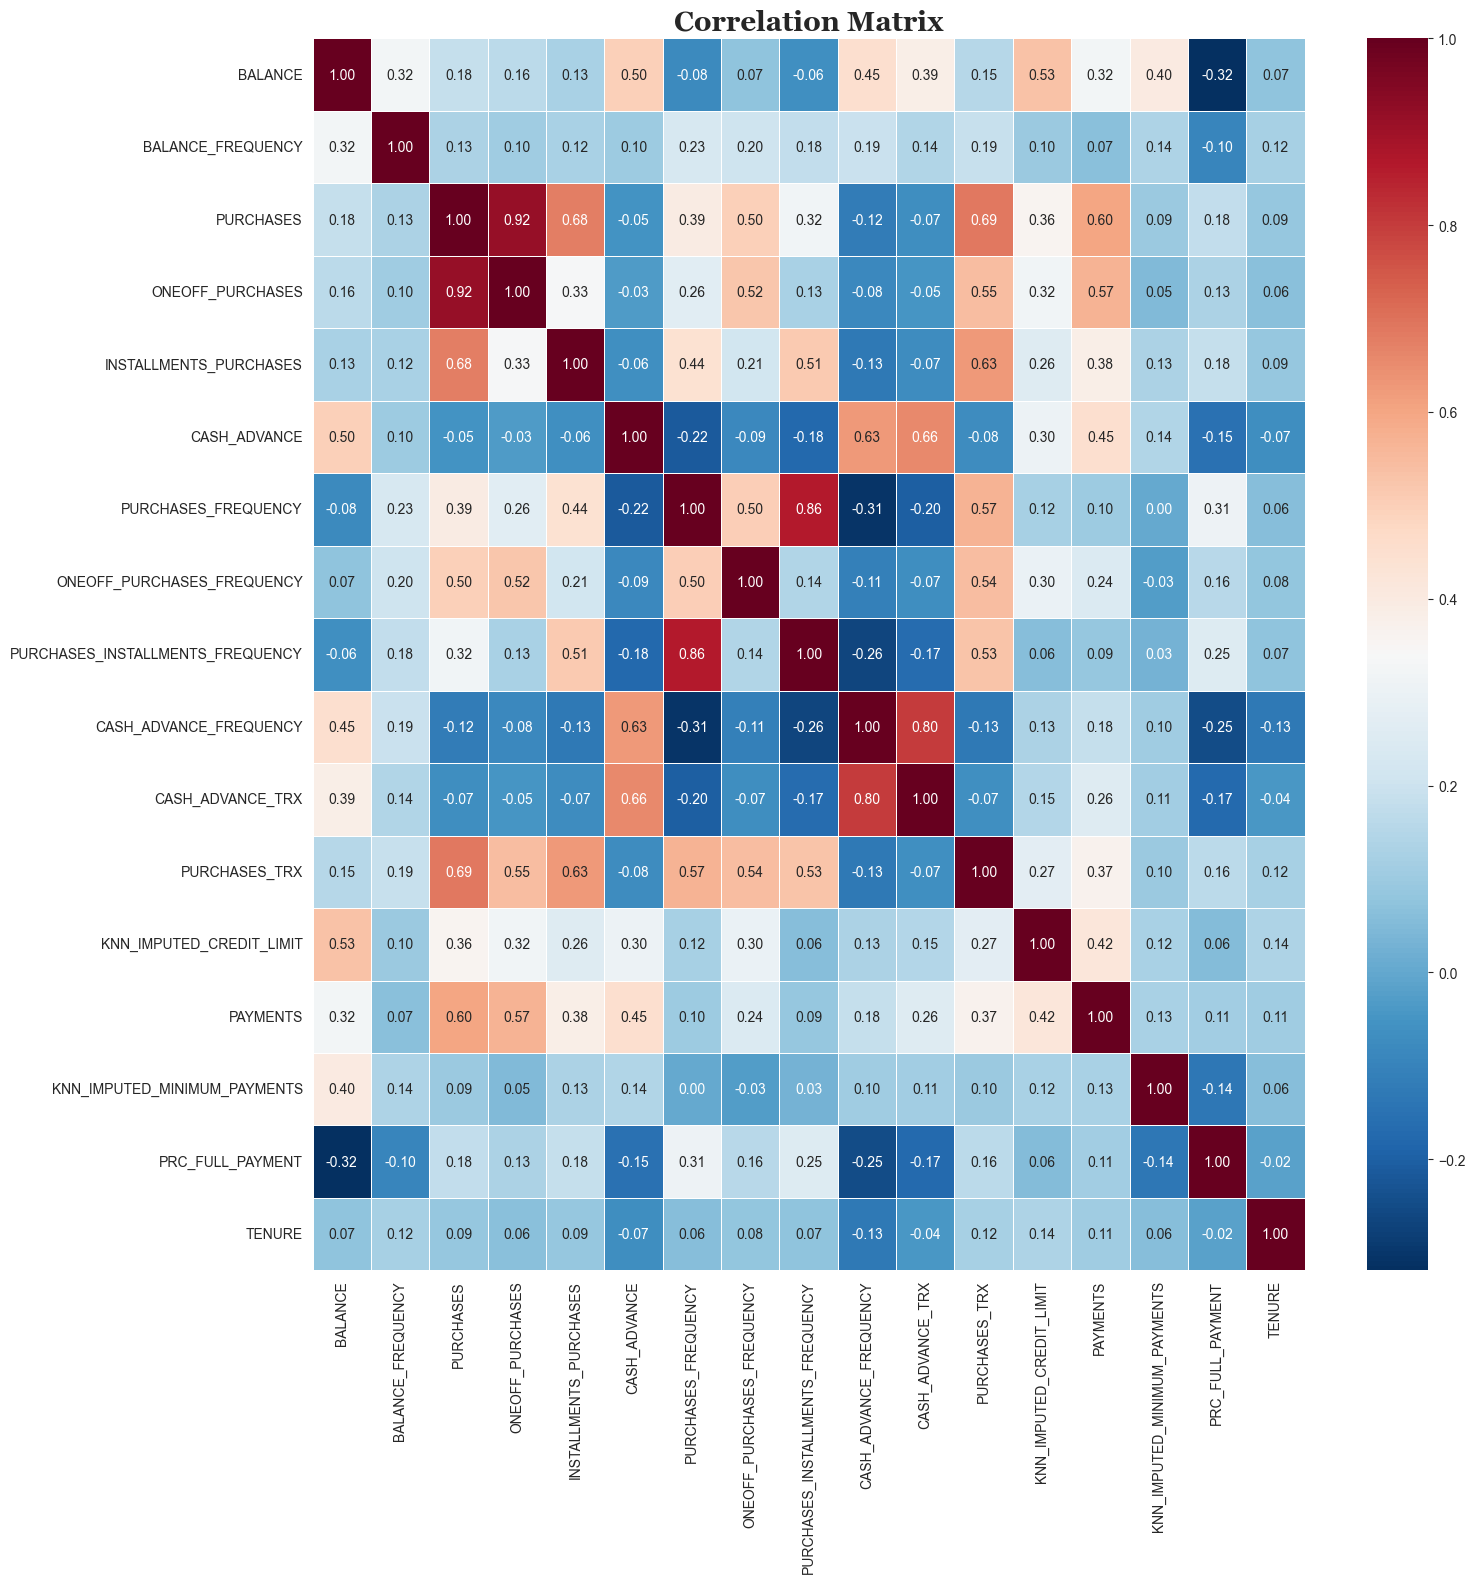

In [109]:
categorical_cols = ['TENURE']
numerical_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                  'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
                  'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                  'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                  'KNN_IMPUTED_CREDIT_LIMIT', 'PAYMENTS', 'KNN_IMPUTED_MINIMUM_PAYMENTS',
                  'PRC_FULL_PAYMENT', 'TENURE']

plt.figure(figsize=(16, 16))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap=sns.color_palette('RdBu_r', as_cmap=True), fmt='.2f', linewidth= .7)
plt.title('Correlation Matrix', fontdict={'family' : 'georgia', 'weight' : 'bold', 'size' : 20})
plt.show()

#### 3.3.2 t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [146]:
categorical_cols = ['TENURE']
numerical_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
                  'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
                  'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
                  'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
                  'KNN_IMPUTED_CREDIT_LIMIT', 'PAYMENTS', 'KNN_IMPUTED_MINIMUM_PAYMENTS',
                  'PRC_FULL_PAYMENT', 'TENURE']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numerical_cols])

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_scaled)

# Create a DataFrame with t-SNE results
df_tsne = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])

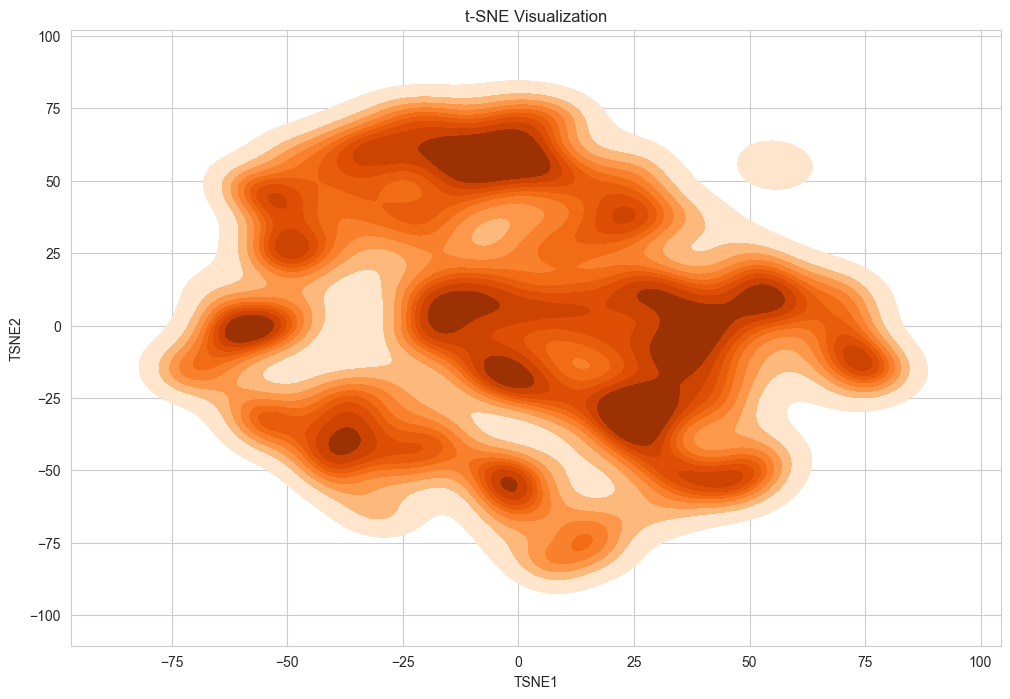

In [149]:
plt.figure(figsize=(12, 8))
sns.kdeplot(x = df_tsne['TSNE1'], y = df_tsne['TSNE2'], cmap = sns.color_palette('Oranges', as_cmap=True), fill = True, bw_adjust = 0.8)
plt.title('t-SNE Visualization')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

### 3.4 Others
#### 3.4.1 ONEOFF_PURCHASES vs INSTALLMENTS_PURCHASES

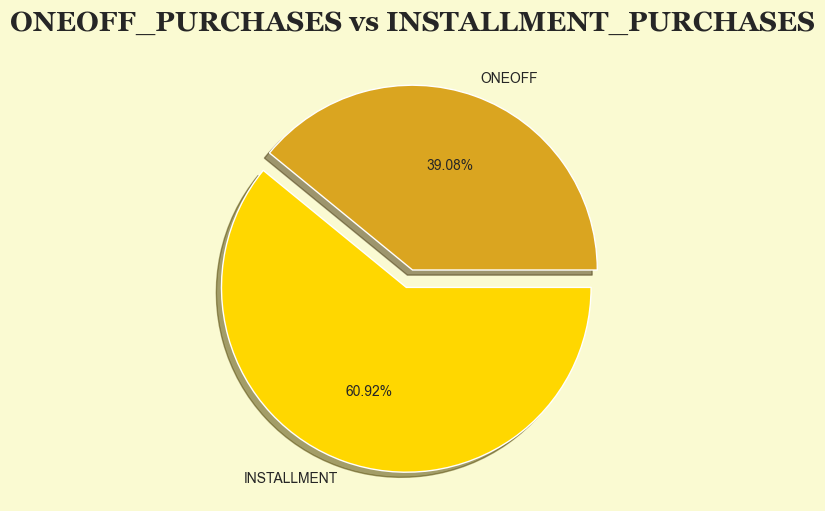

In [112]:
# Data
oneoff_count = sum(df['ONEOFF_PURCHASES'] > df['INSTALLMENTS_PURCHASES'])
installment_count = len(df) - oneoff_count
count = [oneoff_count, installment_count]

# Create figure
fig, ax = plt.subplots(figsize=(15, 6))

# Configure properties
labels = ['ONEOFF', 'INSTALLMENT']
explode = (0, 0.1)
fig.patch.set_facecolor('lightgoldenrodyellow')

# Plot
ax.pie(count, labels=labels, autopct='%1.2f%%', colors=['goldenrod', 'gold'], explode=explode, shadow=True)
ax.set_title('ONEOFF_PURCHASES vs INSTALLMENT_PURCHASES', fontdict={'family': 'georgia', 'weight': 'bold', 'size': 20})

# Show plot
plt.show()

#### 3.4.2 PURCHASES vs CASH_ADVANCE

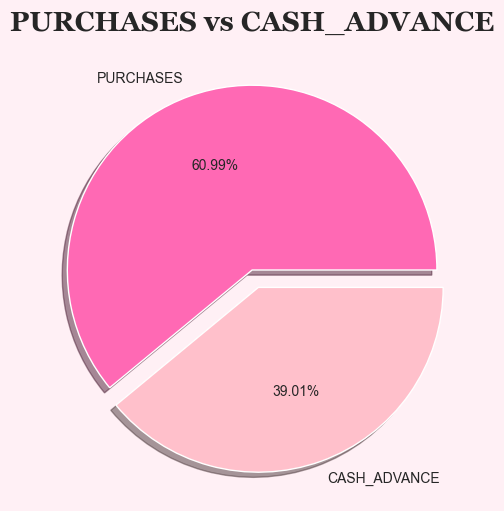

In [113]:
# Data
purchases_count = sum(df['PURCHASES'] > df['CASH_ADVANCE'])
cash_advance_count = len(df) - purchases_count
count = [purchases_count, cash_advance_count]

# Create figure
fig, ax = plt.subplots(figsize=(15, 6))

# Configure properties
labels = ['PURCHASES', 'CASH_ADVANCE']
explode = (0, 0.1)
fig.patch.set_facecolor('lavenderblush')

# Plot
ax.pie(count, labels=labels, autopct='%1.2f%%', colors=['hotpink', 'pink'], explode=explode, shadow=True)
ax.set_title('PURCHASES vs CASH_ADVANCE', fontdict={'family': 'georgia', 'weight': 'bold', 'size': 20})

# Show plot
plt.show()

#### 3.4.3 PPURCHASES_TRX vs CASH_ADVANCE_TRX

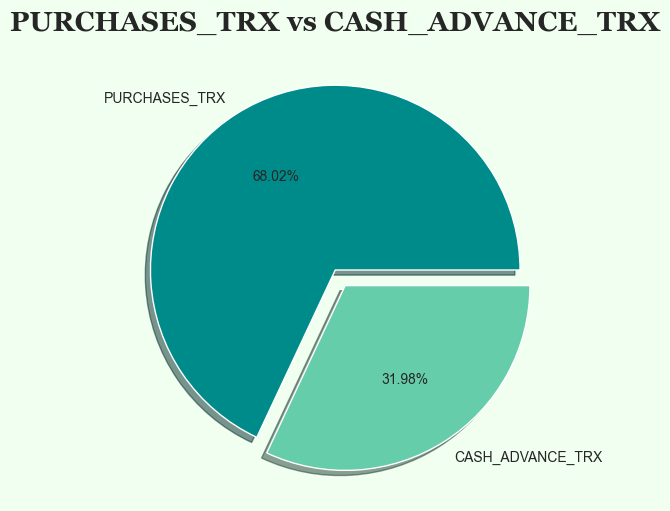

In [111]:
# Data
purchases_trx_count = sum(df['PURCHASES_TRX'] > df['CASH_ADVANCE_TRX'])
cash_advance_trx_count = len(df) - purchases_trx_count
count = [purchases_trx_count, cash_advance_trx_count]

# Create figure
fig, ax = plt.subplots(figsize=(15, 6))

# Configure properties
labels = ['PURCHASES_TRX', 'CASH_ADVANCE_TRX']
explode = (0, 0.1)
fig.patch.set_facecolor('honeydew')

# Plot
ax.pie(count, labels=labels, autopct='%1.2f%%', colors=['darkcyan', 'mediumaquamarine'], explode=explode, shadow=True)
ax.set_title('PURCHASES_TRX vs CASH_ADVANCE_TRX', fontdict={'family': 'georgia', 'weight': 'bold', 'size': 20})

# Show plot
plt.show()